#### Name: C Vamshi Krishna
#### Roll no: AM.EN.U4ELC19043

### Import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load and clean the data

In [2]:
my_data = pd.read_csv('Simple_data_points_for_PNN.csv', sep=',',header=0)
cleaned_data = np.array([ my_data['Feature 1'].tolist(),my_data['Feature 2'].tolist()]).T

In [3]:
print("x\ty")
for i in cleaned_data:
    print(f"{i[0]}\t{i[1]}")

x	y
0.5	0.9
0.2	0.7
0.8	0.8
0.4	0.5
0.8	0.5
0.6	0.3
0.3	0.2


### Declare some useful variables

In [4]:
groups = my_data.groupby('Class')
number_of_classes = len(groups)
dictionary_of_sum = {}
numrber_of_features  = 2
sigma = 1
increament_current_row_in_matrix = 0

### Point that we want to classify

In [5]:
point_want_to_classify = [0.75,0.3]

### Define the PNN

In [6]:
# INPUT LAYER
for k in range(1,number_of_classes+1):

    dictionary_of_sum[k] = 0
    number_of_data_point_from_class_k = len(groups.get_group(k))

    # PATTERN LAYER
    
    # Temporary variable to hold the sum of Gaussian distribution sum
    temp_summnation = 0.0

    # Loop via number of points in the class
    for i in range(1,number_of_data_point_from_class_k+1):

        # Getting Gaussians 
        tempx = (point_want_to_classify[0] - cleaned_data[increament_current_row_in_matrix][0]) * (point_want_to_classify[0] - cleaned_data[increament_current_row_in_matrix][0]) 
        tempy = (point_want_to_classify[1] - cleaned_data[increament_current_row_in_matrix][1]) * (point_want_to_classify[1] - cleaned_data[increament_current_row_in_matrix][1]) 
        temp_sum = -1 * (tempx + tempy)
        temp_sum = temp_sum/( 2 * np.power(sigma,2) )

        # Sum of Gaussians
        temp_summnation = temp_summnation + temp_sum

        # Row of the matrix to get the next data point
        increament_current_row_in_matrix  = increament_current_row_in_matrix + 1

    # Probability of current data point belonging to that class
    dictionary_of_sum[k]  = temp_summnation 

In [7]:
# Get the classified class 
classified_class = str( max(dictionary_of_sum, key=dictionary_of_sum.get) )
classified_class

'3'

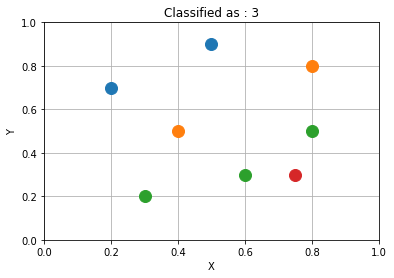

In [8]:
# Group the data by class 
groups = my_data.groupby('Class')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group['Feature 1'], group['Feature 2'], marker='o', linestyle='', ms=12, label=name)

# Draw the unclassified data point
ax.plot(point_want_to_classify[0], point_want_to_classify[1], marker='o', linestyle='', ms=12)

# Setting the limit of x and y axis
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
plt.title('Classified as : ' + str(classified_class) )
plt.xlabel('X')
plt.ylabel('Y')

plt.grid()
plt.show()